In [ ]:
from scipy.io import wavfile

In [1]:
rcParams['figure.figsize'] = (16, 4) #wide graphs by default

In [2]:
import essentia.standard

loader = essentia.standard.MonoLoader(filename = 'sources/Stevie Wonder - Superstition.mp3')
superstition = loader()
superstition_sr = 44100

# Tempo estimation

In [5]:
def windowed_rms(input_sig, win_size, hop=None, sr=1.0):
    if not hop:
        hop = winsize/2
    rms = []
    window_start = arange(0, len(input_sig), hop)
    
    for start in window_start:
        w = input_sig[start: start+win_size].astype(float)
        rms_inst = sqrt(mean(w**2))
        rms.append(rms_inst)
    times = (window_start + win_size/2)/float(sr)
    return times, rms

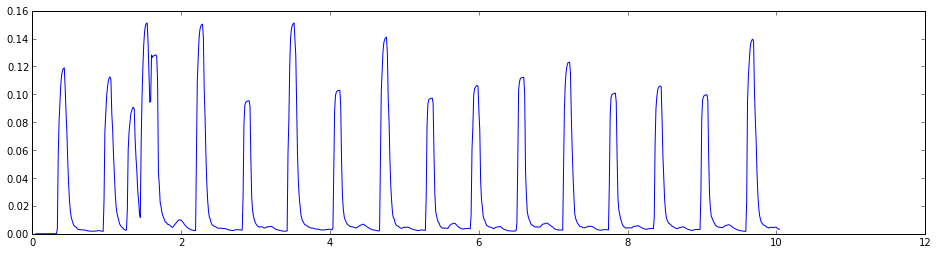

In [4]:
times, super_rms = windowed_rms(superstition[:441000], 4096, 512, 44100)
plot(times, super_rms)

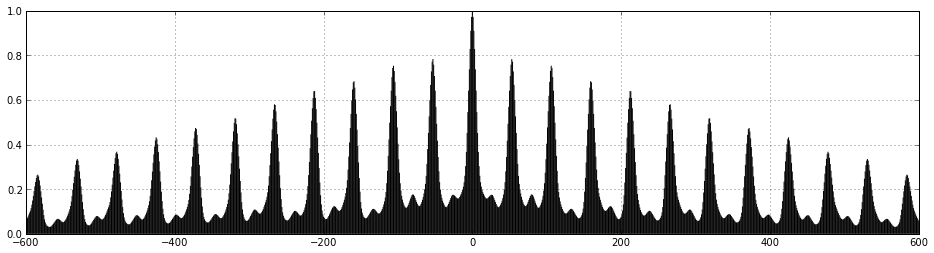

In [6]:
lags, cc, lines, line = acorr(super_rms, maxlags=600)
grid();

In [7]:
argmax(cc[625:]) + 625

653

In [8]:
lags[argmax(cc[625:]) + 625]

53

In [9]:
44100.0/53

832.0754716981132

In [10]:
times[53]

0.66176870748299321

In [11]:
1.0/times[53]

1.5111019736842104

In [12]:
bpm = 60.0/times[53]
print bpm

90.6661184211


$$Cepstrum =\Big|\mathcal{F}^{-1}\Big[\mbox{log}\big(\big|\mathcal{F}[ f(t) ]\big|^2\big)\Big]\Big|^2$$

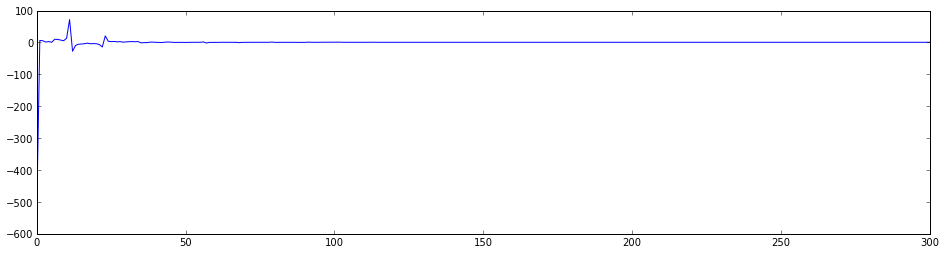

In [14]:
cepstrum = real(fft.rfft(log10(cc[600:])))
plot(cepstrum)

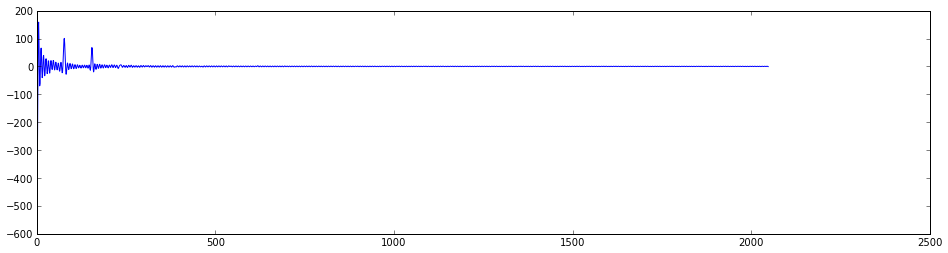

In [16]:
cepstrum = real(fft.rfft(log10(cc[600:]), n=4096))
plot(cepstrum)

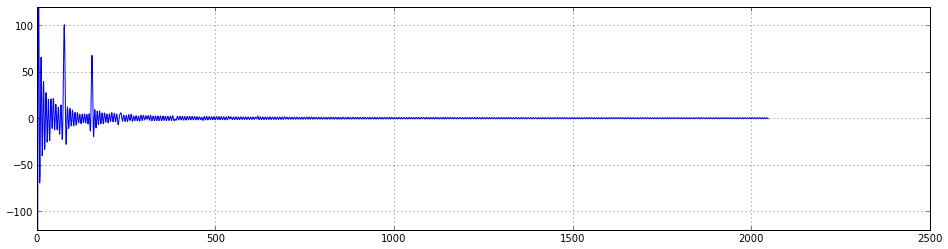

In [17]:
plot(cepstrum)
ylim((-120, 120))
grid()

In [18]:
argmax(cepstrum[50:]) + 50

77

In [23]:
4096/77

53

In [24]:
bpm = 60.0/times[53]
print bpm

90.6661184211


In [25]:
def windowed_acorr(input_sig, win_size, hop=None, sr=1.0, maxlags=None):
    if not hop:
        hop = win_size/2
    if not maxlags:
        maxlags = win_size/4
    window_start = arange(0, len(input_sig) - win_size, hop)
    acorrfs = []
    for start in window_start:
        w = input_sig[start: start+win_size]
        lags, acorr_inst, lines, line = acorr(w, maxlags=maxlags)
        acorrfs.append(acorr_inst)
        
    times = (window_start + win_size/2)/float(sr)
    clf()
    return times, lags, acorrfs

In [26]:
times, super_rms = windowed_rms(superstition, 4096, 512, 44100)

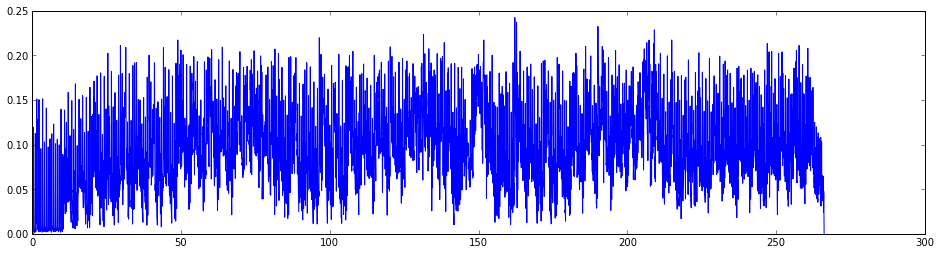

In [28]:
plot(times,super_rms)

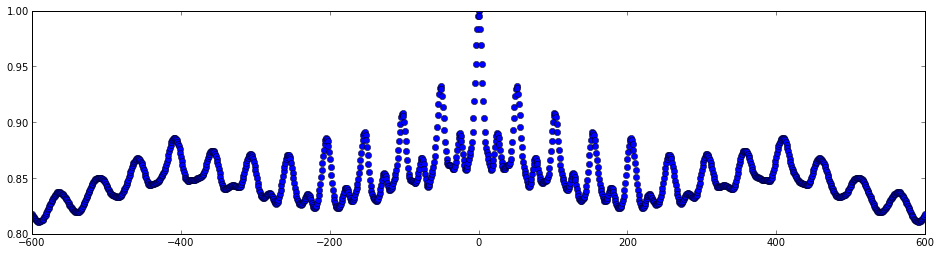

In [29]:
lags, cc, lines, line = acorr(super_rms, maxlags=600, usevlines=False)

In [30]:
argmax(cc[610:]) + 610

651

In [31]:
lags[argmax(cc[610:]) + 610]

51

In [32]:
offset = 610
bpm = 60.0/times[lags[argmax(cc[offset:]) + offset]]
print bpm

93.9630681818


In [33]:
win_time = 10.0 # seconds
rms_win_freq = 44100.0/512
win_size = int (win_time * rms_win_freq)

In [34]:
win_size

861

In [35]:
times_rms, lags_rms, acorrs = windowed_acorr(super_rms, win_size, int(win_size/2), sr=44100, maxlags=600)

<matplotlib.colorbar.Colorbar instance at 0x550a4d0>

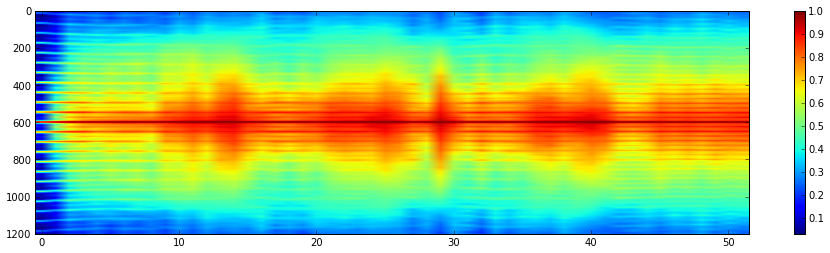

In [37]:
imshow(array(acorrs).T, aspect='auto')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x92618c0>

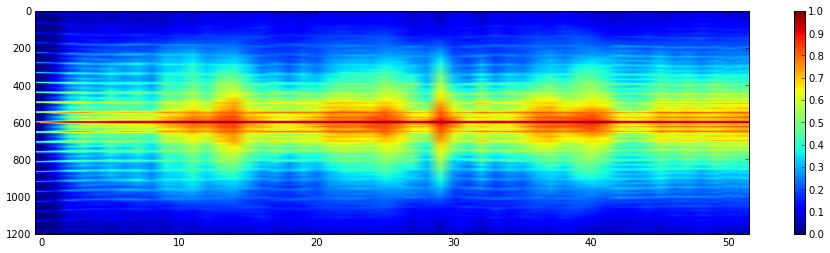

In [38]:
imshow(array(acorrs).T**2, aspect='auto')
colorbar()

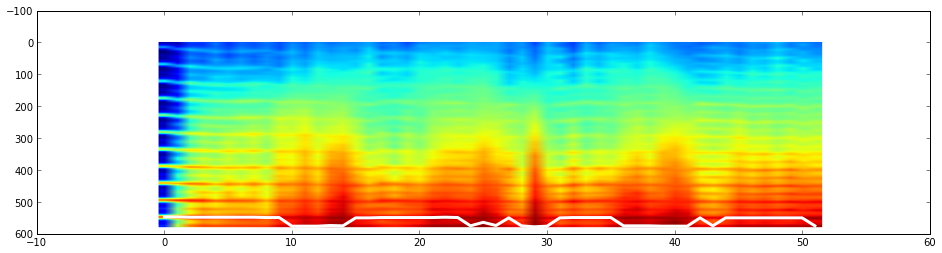

In [39]:
acorrs_sub = array(acorrs)[:,:580]
imshow(acorrs_sub.T, aspect='auto')
acorrs_sub.shape
plot(argmax(array(acorrs)[:,:580], axis=1), color='w', lw=3)

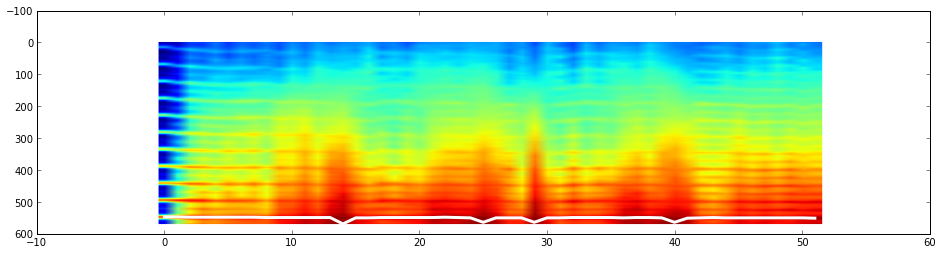

In [40]:
offset = 30
maxlags = 600
acorrs_sub = array(acorrs)[:,:maxlags-offset]
imshow(acorrs_sub.T, aspect='auto')
acorrs_sub.shape
plot(argmax(array(acorrs)[:,:maxlags-offset], axis=1), color='w', lw=3)

(0.8, 1)

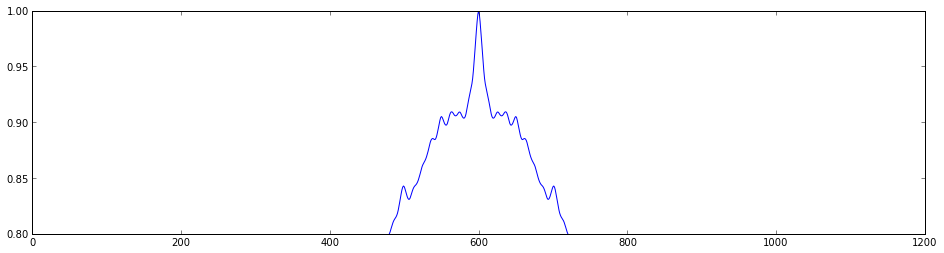

In [47]:
plot(array(acorrs)[25])
ylim((0.8, 1))

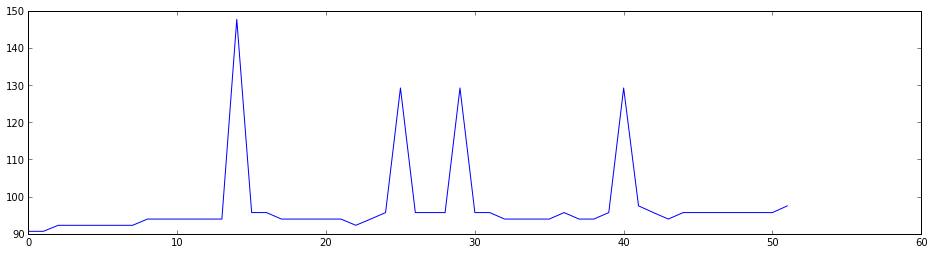

In [41]:
tempobpm = argmax(array(acorrs)[:,:maxlags-offset], axis=1)
plot(60.0/times[abs(lags_rms[tempobpm])])

(80, 100)

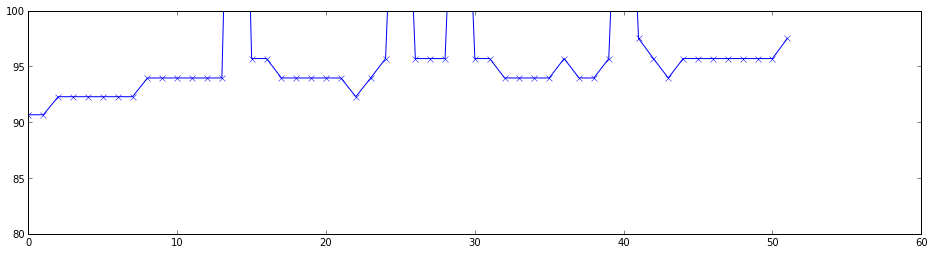

In [44]:
plot(60.0/times[abs(lags_rms[tempobpm])], 'x-')
ylim((80, 100))

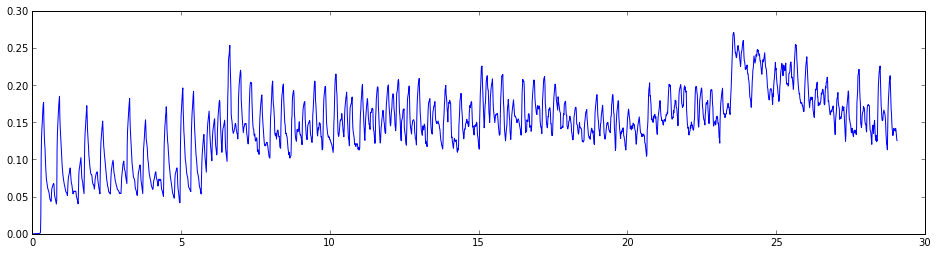

In [59]:
loader = essentia.standard.MonoLoader(filename = 'sources/Led Zeppelin - Rock And Roll.mp3')
rockroll = loader()
rockroll_sr = 44100
rms_hop = 512
rms_winsize = 4096

times, rock_rms = windowed_rms(rockroll, rms_winsize, rms_hop, rockroll_sr)
plot(times[:2500], rock_rms[:2500])

(0.9, 1.0)

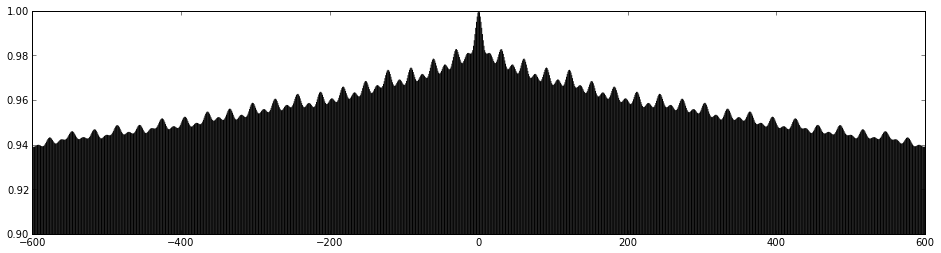

In [60]:
maxlags = 600
lags, cc, lines, line = acorr(rock_rms, maxlags=maxlags)
ylim((0.9, 1.0))

In [66]:
offset = 30
bpm = 60.0/times[lags[argmax(cc[maxlags + offset:]) + maxlags + offset]]
print bpm

151.999080882


In [62]:
win_time = 10.0 # seconds
rms_win_freq = float(rockroll_sr)/rms_hop
win_size = int (win_time * rms_win_freq)

times_rms, lags_rms, acorrs = windowed_acorr(rock_rms, win_size, int(win_size/2), sr=44100, maxlags=maxlags)


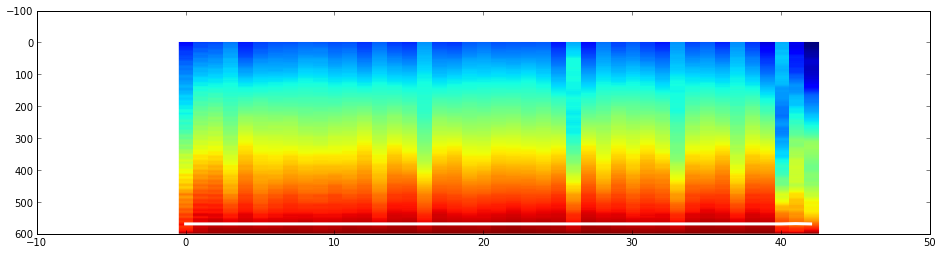

In [67]:
offset = 30
acorrs_sub = array(acorrs)[:,:maxlags]
imshow(acorrs_sub.T, aspect='auto', interpolation='nearest')
acorrs_sub.shape
plot(argmax(array(acorrs)[:,:maxlags-offset], axis=1), color='w', lw=3)

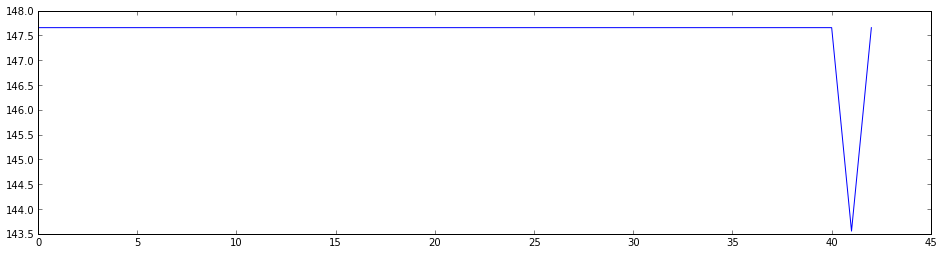

In [68]:
tempobpm = argmax(array(acorrs)[:,:maxlags-offset], axis=1)
plot(60.0/times[abs(lags_rms[tempobpm])])

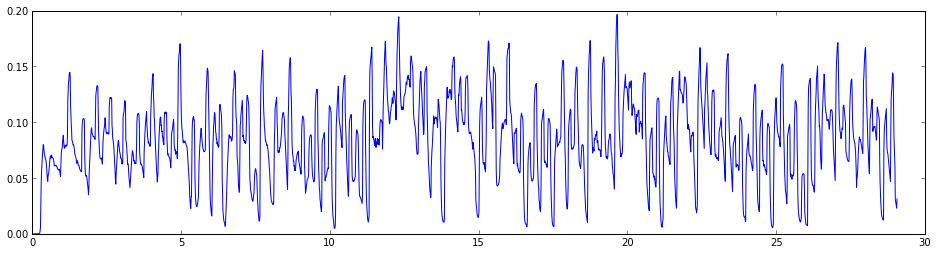

In [69]:
loader = essentia.standard.MonoLoader(filename = 'sources/Isaac Hayes - Out Of The Ghetto.mp3')
rockroll = loader()
rockroll_sr = 44100
rms_hop = 512
rms_winsize = 4096

times, rock_rms = windowed_rms(rockroll, rms_winsize, rms_hop, rockroll_sr)
plot(times[:2500], rock_rms[:2500])

(0.7, 1.0)

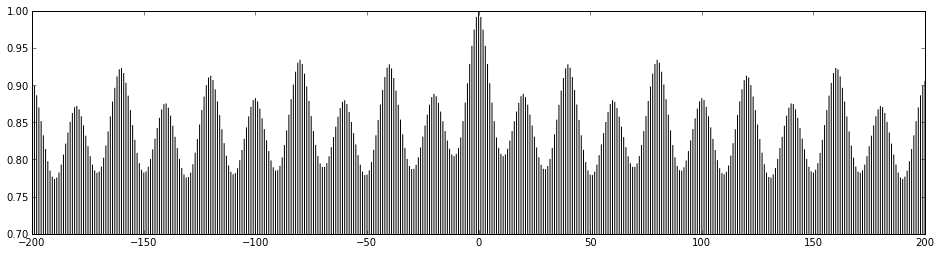

In [70]:
maxlags = 200
lags, cc, lines, line = acorr(rock_rms, maxlags=maxlags)
ylim((0.7, 1.0))

In [72]:
offset = 30
bpm = 60.0/times[lags[argmax(cc[maxlags + offset:]) + maxlags + offset]]
print bpm

61.5234375


In [73]:
win_time = 10.0 # seconds
rms_win_freq = float(rockroll_sr)/rms_hop
win_size = int (win_time * rms_win_freq)

times_rms, lags_rms, acorrs = windowed_acorr(rock_rms, win_size, int(win_size/2), sr=44100, maxlags=maxlags)

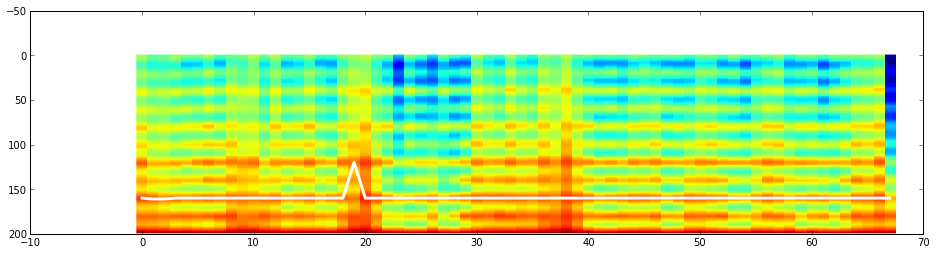

In [74]:
offset = 30
acorrs_sub = array(acorrs)[:,:maxlags]
imshow(acorrs_sub.T, aspect='auto', interpolation='nearest')
acorrs_sub.shape
plot(argmax(array(acorrs)[:,:maxlags-offset], axis=1), color='w', lw=3)

(110, 125)

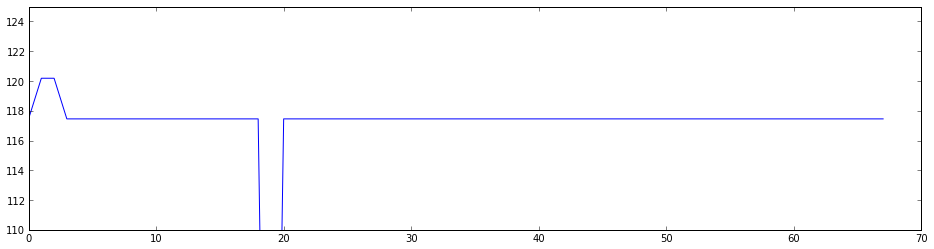

In [75]:
tempobpm = argmax(array(acorrs)[:,:maxlags-offset], axis=1)
plot(60.0/times[abs(lags_rms[tempobpm])])
ylim((110, 125))

How can we give better resolution to the BPM detector?

By Andrés Cabrera mantaraya36@gmail.com

For course MAT 240E at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)